In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

Source = https://www.kaggle.com/code/prashant111/k-means-clustering-with-python

In [2]:
df = pd.read_csv('nft_sales.csv', error_bad_lines=False)

In [3]:
df.head()

,Collections,Sales,Buyers,Txns,Owners
0,Axie Infinity,"$4,090,222,023","1,790,587","17,670,824","2,130,467"
1,Bored Ape Yacht Club,"$2,439,754,017","12,052","32,670","6,586"
2,CryptoPunks,"$2,388,467,992","6,076","22,269","3,804"
3,Mutant Ape Yacht Club,"$1,744,822,678","23,768","51,775","13,121"
4,Art Blocks,"$1,310,734,558","33,549","184,470","36,091"


In [4]:
df = df.replace(',','', regex=True) #Removing commas
df['Sales'] = df['Sales'].str.replace('$', '') #Removing dollar signs

In [5]:
df.head()

,Collections,Sales,Buyers,Txns,Owners
0,Axie Infinity,4090222023,1790587,17670824,2130467
1,Bored Ape Yacht Club,2439754017,12052,32670,6586
2,CryptoPunks,2388467992,6076,22269,3804
3,Mutant Ape Yacht Club,1744822678,23768,51775,13121
4,Art Blocks,1310734558,33549,184470,36091


In [6]:
df= df.dropna() 

In [7]:
df['Collections'] = df['Collections'].fillna('None')

In [8]:
df.head()

,Collections,Sales,Buyers,Txns,Owners
0,Axie Infinity,4090222023,1790587,17670824,2130467
1,Bored Ape Yacht Club,2439754017,12052,32670,6586
2,CryptoPunks,2388467992,6076,22269,3804
3,Mutant Ape Yacht Club,1744822678,23768,51775,13121
4,Art Blocks,1310734558,33549,184470,36091


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 249
Data columns (total 5 columns):
Collections    231 non-null object
Sales          231 non-null object
Buyers         231 non-null object
Txns           231 non-null object
Owners         231 non-null object
dtypes: object(5)
memory usage: 10.8+ KB


In [10]:
#Converting object to float for the numerical values
df["Sales"] = df["Sales"].astype(np.int64)
df["Buyers"] = df["Buyers"].astype(np.int64)
df["Txns"] = df["Txns"].astype(np.int64)
df["Owners"] = df["Owners"].astype(np.int64)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 249
Data columns (total 5 columns):
Collections    231 non-null object
Sales          231 non-null int64
Buyers         231 non-null int64
Txns           231 non-null int64
Owners         231 non-null int64
dtypes: int64(4), object(1)
memory usage: 10.8+ KB


In [12]:
df.describe()

,Sales,Buyers,Txns,Owners
count,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02
mean,1.377520e+08,2.196901e+04,3.154530e+05,3.911334e+04
std,3.897715e+08,1.249546e+05,2.008909e+06,2.936604e+05
min,2.090187e+07,8.100000e+01,1.120000e+02,1.140000e+02
25%,2.976127e+07,5.324000e+03,1.311100e+04,3.253000e+03
50%,4.644460e+07,8.239000e+03,1.843700e+04,4.411000e+03
75%,8.767439e+07,1.120450e+04,2.460650e+04,5.719500e+03
max,4.090222e+09,1.790587e+06,2.181756e+07,3.843236e+06


In [13]:
X = df
y = df["Collections"]

In [14]:
encoder = LabelEncoder()  #Encoding Categorical Value, which in this case is Collections
X['Collections'] = encoder.fit_transform(X['Collections'])
y = encoder.transform(y)

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 249
Data columns (total 5 columns):
Collections    231 non-null int32
Sales          231 non-null int64
Buyers         231 non-null int64
Txns           231 non-null int64
Owners         231 non-null int64
dtypes: int32(1), int64(4)
memory usage: 9.9 KB


In [16]:
X.head()

,Collections,Sales,Buyers,Txns,Owners
0,19,4090222023,1790587,17670824,2130467
1,28,2439754017,12052,32670,6586
2,53,2388467992,6076,22269,3804
3,138,1744822678,23768,51775,13121
4,16,1310734558,33549,184470,36091


In [17]:
# Feature Scaling
col = X.columns
min_max = MinMaxScaler()
X = min_max.fit_transform(X)
X = pd.DataFrame(X, columns=[col])
X.head()

,Collections,Sales,Buyers,Txns,Owners
0,0.082609,1.000000,1.000000,0.809935,0.554329
1,0.121739,0.594412,0.006686,0.001492,0.001684
2,0.230435,0.581809,0.003348,0.001016,0.000960
3,0.600000,0.423639,0.013229,0.002368,0.003384
4,0.069565,0.316965,0.018692,0.008450,0.009361


In [18]:
# Clustering process with n_clusters = 4

from sklearn.cluster import KMeans

K_means = KMeans(n_clusters=4, random_state=0) 

K_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [19]:
K_means.cluster_centers_

array([[0.50950725, 0.02135922, 0.00559303, 0.00790384, 0.00217333],
       [0.17286736, 0.03669339, 0.00882641, 0.0076129 , 0.01642281],
       [0.34782609, 0.62434483, 0.62466671, 0.90496736, 0.3674441 ],
       [0.83913043, 0.01178308, 0.00610345, 0.00446189, 0.00198477]])

In [20]:
K_means.inertia_

5.4415975010608495

In [21]:
label = K_means.labels_
correct_labels = sum(y == label)
print((correct_labels, y.size))

(1, 231)


Above Code says 1 out of 231 samples are categorized correctly, since each of the NFTs are different, so they each have a unique category, due to the exclusivity of NFTs

In [22]:
print((correct_labels/float(y.size))) # Accuracy Score

0.004329004329004329


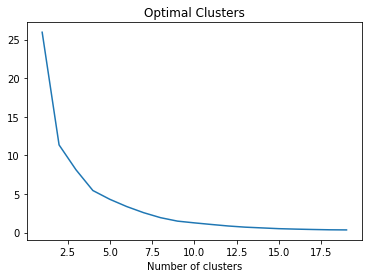

In [23]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 20):
    K_means = KMeans(n_clusters = i, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
    K_means.fit(X)
    cs.append(K_means.inertia_)
plt.plot(range(1, 20), cs)
plt.title('Optimal Clusters')
plt.xlabel('Number of clusters')
plt.show()